# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [4, 121, 351]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,22615,5410,7198,3915,1777,5185
1,4020,3234,1498,2395,264,255
2,1210,10044,22294,1741,12638,3137


In [4]:
print 'Distance from mean of samples: '
display(samples - np.round(data.mean()))
print 'Distance from median of samples: '
display(samples - np.round(data.median()))

Distance from mean of samples: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10615,-386,-753,843,-1104,3660
1,-7980,-2562,-6453,-677,-2617,-1270
2,-10790,4248,14343,-1331,9757,1612


Distance from median of samples: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,14111,1783,2442,2389,961,4219
1,-4484,-393,-3258,869,-552,-711
2,-7294,6417,17538,215,11822,2171


In [8]:
# look at percentile ranks
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
display(pd.DataFrame(pcts))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
4,85.7,64.8,63.6,77.5,63.0,96.8
121,28.9,45.7,12.5,63.2,25.7,15.2
351,12.3,85.2,94.3,53.9,96.1,91.4


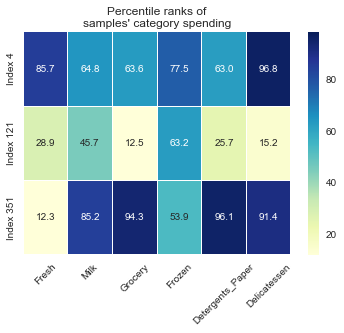

In [9]:
# visualize percentiles with heatmap
sns.heatmap(pcts, yticklabels=['Index '+str(x) for x in indices], annot=True, linewidth=.1, vmax=99, fmt='.1f', cmap='YlGnBu')
plt.title('Percentile ranks of\nsamples\' category spending')
plt.xticks(rotation=45, ha='center');

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

The first establishment could be a sit-down restuarant because it purchased a largest amount of fresh foods and delicatessen in comparison to the other two establishments; a restuarant could also be more likely to buy specialty foods ("delicatessen") compared to places like cafes or hotels.  We can see from the heatmap above that most of the purchases for this data point is in the upper quartiles (above the 60th percentile); this establishments purchases large quantities of every category compared to other establishments in our dataset.

The second could be a small cafe because it purchased less in each category but it purchased the most in the 'fresh' and 'milk' categories.  Cafes could be likely to buy more dairy and fresh foods than delicatessen and grocery items.  From the heatmap, most of its purchases fall into the mid or lower quartiles so this place is likely small in comparison to other establishments.  In other words, this is more likely to be a small cafe versus a large restaurant.

The third is most likely a market because it purchased the most detergents/paper out of any of the three establishments and also a large amount of groceries, two things a customer may find in bulk at markets.  It also purchased a large amount of milk and detergents_papers compared to the other two establishments, which could indicate that it could be a coffeeshop/cafe which serves a lot of dairy items.  From the heatmap, we see that this place did not purchase a large amount of "Fresh" foods in comparison to other establishments but in other purchases (e.g. Milk, Detergents_Paper, Delicatessen), it's very similar to the first establishment.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [10]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
target = data['Detergents_Paper']
new_data = data.drop('Detergents_Paper', axis = 1)

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor = regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)

print 'r^2 is: ', str(score)

r^2 is:  0.271666980627


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

I attempted to predict 'Detergents_Paper'.  The reported r^2 score was 0.272.  I would not say this feature is relevant because the r^2 score is very small and the prediction rate was very low.  Therefore, I would not say this feature is necessary in predicting customer spending.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

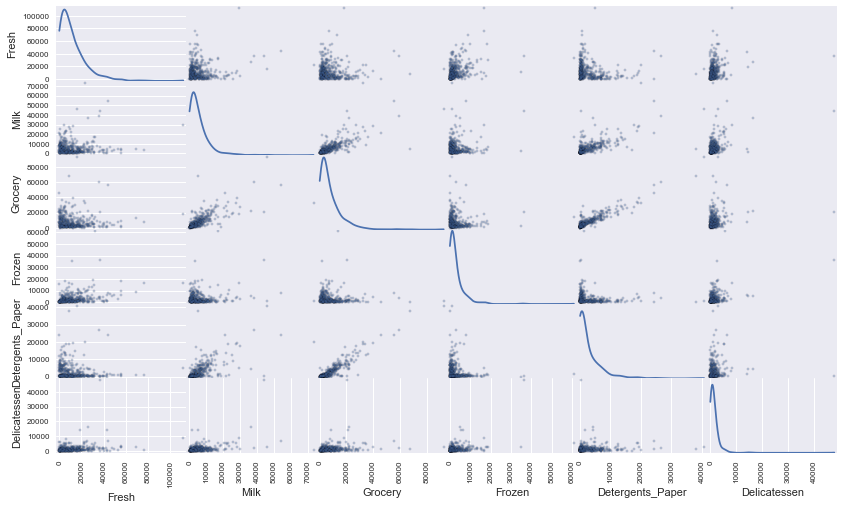

In [13]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [14]:
# fit 2 feature (Grocery, Milk) model to target Detergents_Paper

target = data['Detergents_Paper']
features = data[['Grocery', 'Milk']]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

reg = DecisionTreeRegressor(random_state=42)
reg = reg.fit(X_train, y_train)

score = reg.score(X_test, y_test)

print 'r^2 of 2 feature model is: ', str(score)

r^2 of 2 feature model is:  0.393373180672


In [16]:
# fit 1 feature (Grocery) model to target Detergents_Paper

target = data['Detergents_Paper']
features = data[['Grocery']]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

reg2 = DecisionTreeRegressor(random_state=42)
reg2 = reg2.fit(X_train, y_train)

score = reg2.score(X_test, y_test)

print 'r^2 of single feature model is: ', str(score)

r^2 of single feature model is:  0.557642619943


### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

The data is skewed right for all features, and most data points lie in the lower left corner in the correlation plots.

Detergents_Paper appears to have strong correction with grocery and somewhat weaker correlation with milk. From the scatter matrix, we can see that the scatterplot for (Detergents_Paper, Milk) appears to have more outliers than the scatterplot for (Detergents_Paper, Grocery).

Detergents_Paper also appears to have little correlation with Fresh, Frozen, and Delicatessen.  This mix of strong and weak correlations gave us an overall r^2 value of 0.2717 when we fit Detergents_Paper on all other features using a Decision Tree Regressor.  Since these results make it somewhat unclear whether this feature is relavant, we can try fitting a Decision Tree Regressor using a different number of features.

Since there appears to be a mix of strong/weak correlations for Detergents_Paper and the features, I found the r^2 value for Detergents and Grocery/Milk and Detergents and Grocery.  For the two feature (Grocery, Milk) model, the r^2 value is 0.3934 and for the single feature model (Grocery), the r^2 value is 0.5576. Although a r^2 value of 0.5576 indicates strong correlation, we are not only predicting on this value and we cannot say that Detergents_Paper is a relevant feature when we look at the bigger picture (i.e. in comparison to **all** other features).

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

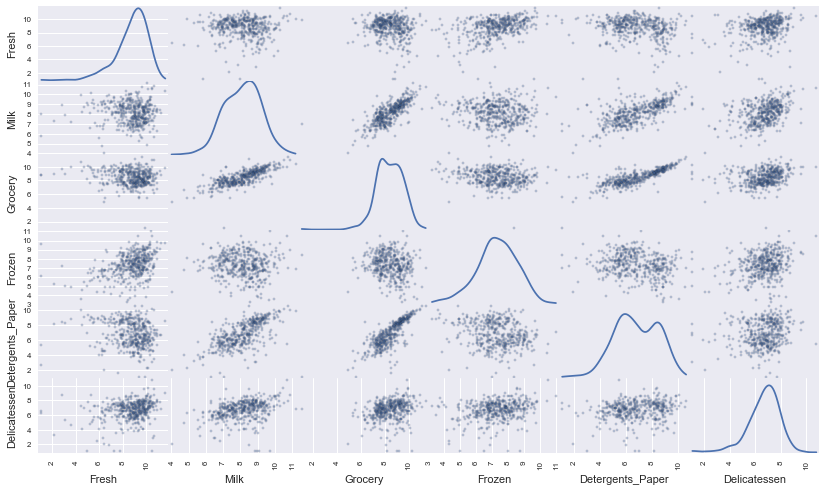

In [17]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

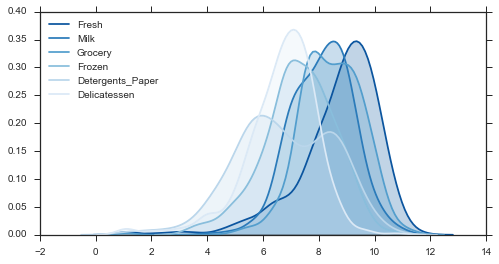

In [19]:
## specify plot style
sns.set_style('ticks')

# set color scheme
with sns.color_palette("Blues_r"):
    # plot densities of log-transformed data
    plt.figure(figsize=(8,4))
    for col in data.columns:
        sns.kdeplot(log_data[col], shade=True)
    plt.legend(loc=2);

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [20]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
1,8.299037,8.081475,7.311886,7.781139,5.575949,5.541264
2,7.098376,9.214731,10.012073,7.462215,9.444463,8.051022


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [21]:
temp_outliers = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(a=log_data[feature], q=25.0)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(a=log_data[feature], q=75.0)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])

    # Get outlier indices
    below = np.where( log_data[feature] < Q1 - step )
    above = np.where( log_data[feature] > Q3 + step )
    
    # Append to temp_outliers if outlier exists
    if len(below[0]) > 0:
        for i in range(0, len(below[0])):
            temp_outliers.append(below[0][i])
    if len(above[0]) > 0:
        for i in range(0, len(above[0])):
            temp_outliers.append(above[0][i])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [65, 66, 75, 128, 154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [22]:
# print sorted list of outliers found -- with possible duplicate values
print np.sort(temp_outliers)

[ 38  57  65  65  66  66  75  75  81  86  95  96  98 109 128 128 137 142
 145 154 154 154 161 171 175 183 184 187 193 203 218 233 264 285 289 304
 305 325 338 343 353 355 356 357 412 420 429 439]


In [23]:
import collections

# print outliers that occur more than once
print np.sort([outlier for outlier, num_occur in collections.Counter(temp_outliers).items() if num_occur > 1])

[ 65  66  75 128 154]


### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

The data points that are considered outliers for more than one feature are 65, 66, 75, 128, and 154.  For this reason, I do believe these data points should be removed from the dataset and I have added these points to the outliers list to be removed. 

Removing outliers is an important step because data points with lots of deviation (e.g. outliers) receive a lot of weight in clustering models so at the very least we want to remove outliers that appear in more than one feature.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

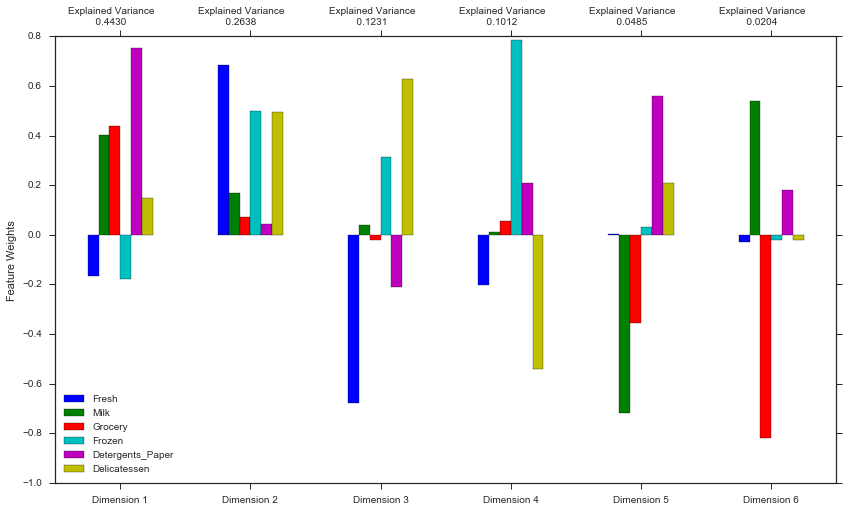

In [24]:
# TODO: Apply PCA to the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca = pca.fit(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

In [25]:
print pca.explained_variance_ratio_
print '\n'
print 'variance explained by first two principal components: ', np.sum(pca.explained_variance_ratio_[:2])
print 'variance explained by first four principal components: ', np.sum(pca.explained_variance_ratio_[:4])

[ 0.44302505  0.26379218  0.1230638   0.10120908  0.04850196  0.02040793]


variance explained by first two principal components:  0.706817230807
variance explained by first four principal components:  0.931090109951


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

70.7% of the variance in the data is explained in total by the first and second principal component. 93.1% of the data is explained by the first four principal components.

In terms of customer spending, Milk, Grocery, and Detergents_Paper is strongly correlated to the first principal component.  When an establishments purchased Detergents_Paper, they are also likely to purchase milk and groceries.  In other words, these items are likely to be bought together.

In the second principal component, we see that there is strong correlation with Fresh, Frozen, and Delicatessen.  These items are likely to be purchased together by an establishment.  However, in the third principal component, we see a negative correlation with Fresh and Froze/Delicatessen.  This implies that there exists establishments that purchase a large amount of Delicatessen and some Frozen foods that do not purchase much Fresh foods.  In the fourth principal component, we can also see another type of establishment that purchases a very large quantity of Frozen food but not much Fresh food or Delicatessen.  This type of place could possible be an ice cream shop or similar.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [26]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.7848,2.3943,0.4798,-0.3483,0.3191,-0.0613
1,-1.6168,-0.8030,0.0153,0.7586,-0.4681,0.7209
2,3.5620,-0.0014,1.4795,0.3680,0.4277,-0.1850


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [27]:
# TODO: Fit PCA to the good data using only two dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

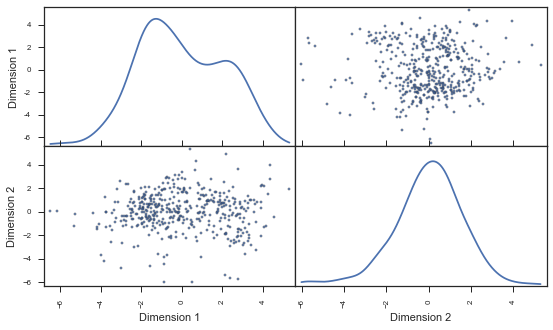

In [45]:
# Produce a scatter matrix for pca reduced data
pd.scatter_matrix(reduced_data, alpha = 0.8, figsize = (9,5), diagonal = 'kde');

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [28]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.7848,2.3943
1,-1.6168,-0.8030
2,3.5620,-0.0014


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
The advantages to using a K-Means clustering algorithm is that it's a general purpose clustering algorithm that is scalable and creates equal cluster sizes.  The Gaussian Mixture Model is the fastest algorithm for learning mixture models, and it does not have a tendency to bias the mean towards zero or the cluster sizes to have specific structures. KMeans is also "a special case of Gaussian mixture model with equal covariance per component" (see source). The GMM also use 'soft/fuzzy clustering' whereas K-Means uses 'hard clustering', which means that a data point can belong to one and only one cluster.  In soft/fuzzy clustering, a data point may belong to one or more clusters.  K-means also assumes spherical/globular and symmetrical clusters while GMM assumes the clusters to be elliptical.

I will use the Guassian Mixture model because we have a small data set so we don't need to worry about speed differences between GMM and K-means.  Also, I don't want the model to bias the mean towards zero or to assume spherical and symmetrical clusters, which do not always occur in "real life" data.


**source:** http://scikit-learn.org/stable/modules/clustering.html

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [54]:
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

#keep the scores for each cluster size
silhouette_scores = []

for n in range(2, 7, 1):
    # TODO: Apply your clustering algorithm of choice to the reduced data
    try:
        clusterer = GMM(n_components = n).fit(reduced_data)
        
        # TODO: Predict the cluster for each data point
        preds = clusterer.fit_predict(reduced_data)
        
        # TODO: Find the cluster centers
        centers = np.round(clusterer.means_, n)
        
        # TODO: Predict the cluster for each transformed sample data point
        sample_preds = clusterer.fit_predict(log_samples)
        
        # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
        score = silhouette_score(X=reduced_data, labels=preds, random_state=42)
        
    except:
        break

    print 'Score of', n, 'clusters:', score.round(5)

Score of 2 clusters: 0.41182
Score of 3 clusters: 0.39143


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

The silhouette score for 2 clusters is 0.411819 and the silhouette score for 3 clusters is 0.373561.  The 2 cluster model has the better silhouette score of 0.412 so we will use 2 clusters for our model.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

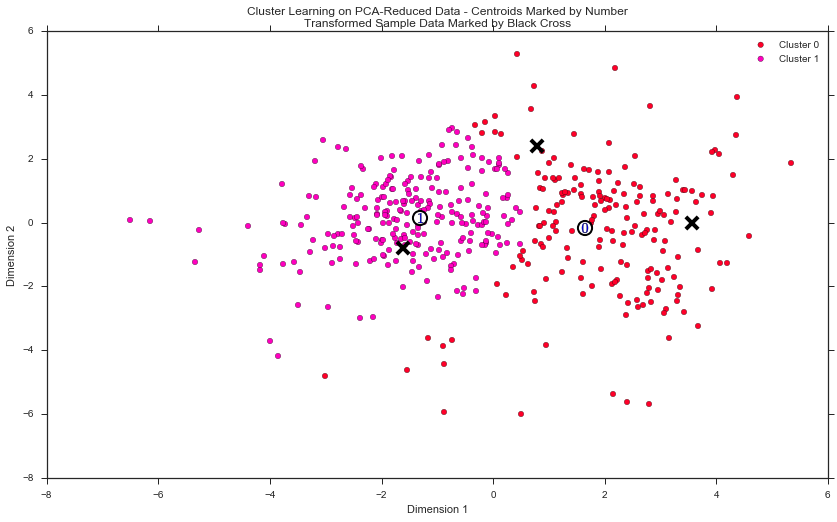

In [56]:
clusterer = GMM(n_components = 2).fit(reduced_data)

preds = clusterer.fit_predict(reduced_data)
centers = np.round(clusterer.means_, 2)

sample_preds = clusterer.fit_predict(log_samples)

score = silhouette_score(X=reduced_data, labels=preds, random_state=42)

# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [57]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4309,6353,9566,1035,3052,945
Segment 1,8796,2051,2687,2055,337,711


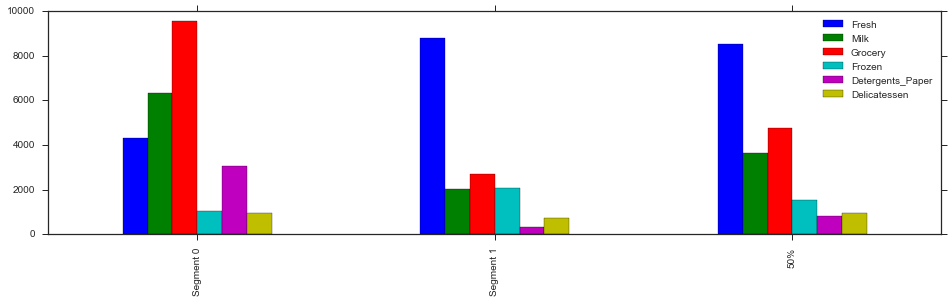

In [58]:
true_centers = true_centers.append(data.describe().ix['50%'])
true_centers.plot(kind = 'bar', figsize = (16, 4))

In [59]:
display(pd.DataFrame(true_centers))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4309,6353,9566.0,1035,3052.0,945.0
Segment 1,8796,2051,2687.0,2055,337.0,711.0
50%,8504,3627,4755.5,1526,816.5,965.5


In [66]:
print 'Distance from overall median: '
display(true_centers - data.median().round())
print 'Distance from overall mean: '
display(true_centers - data.mean().round())

Distance from overall median: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-4195,2726,4810.0,-491,2236.0,-21.0
Segment 1,292,-1576,-2069.0,529,-479.0,-255.0
50%,0,0,-0.5,0,0.5,-0.5


Distance from overall mean: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-7691,557,1615.0,-2037,171.0,-580.0
Segment 1,-3204,-3745,-5264.0,-1017,-2544.0,-814.0
50%,-3496,-2169,-3195.5,-1546,-2064.5,-559.5


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

Compared to the overall median, Segment 0's central point has more purchases in Milk, Grocery, and Detergents_Paper; is is also "at par" in Delicatessen purchases with the true center.  It's also interesting to note that Segment 0's central point has much more Grocery purchases.  Segment 1's central point has more purchases in Fresh and Frozen foods.

Using the graph and the numeric observations above, the first cluster (segment 0) could be a grocery store of some sort since there's a large value for the Grocery category, and compared to the first cluster, the second has larger values for Milk, Grocery, and Detergents_Paper, all of which are things one can find in a typical grocery store.

The second cluster (segment 1) could be a cafe or small restaurant because there is a large value for the Fresh and Frozen category relative to the other 5 categories.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [67]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


In [68]:
# display original samples
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,22615,5410,7198,3915,1777,5185
1,4020,3234,1498,2395,264,255
2,1210,10044,22294,1741,12638,3137


In [69]:
print 'Samples'' distance from the true center: '
display(samples - np.round(true_centers.median()))

Samples distance from the true center: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,14111,1783,2442,2389,961,4240
1,-4484,-393,-3258,869,-552,-690
2,-7294,6417,17538,215,11822,2192


**Answer:**

From the code block,  the samples were predicted as follows:

- Sample point 0 predicted to be in Cluster 0
- Sample point 1 predicted to be in Cluster 1
- Sample point 2 predicted to be in Cluster 0

The above results do seem fairly consistent with the predicted clusters.  Samples 0 and 2 both purchased very large amounts of Detergents_Paper and Grocery compared to the "true mean".  These two points resemble each other and cluster 0's center.  Sample 1 has a noticeably different purchasing pattern as it purchased less in each category (excluding Froze foods) than the "true mean" so it's unsuprising that it is in cluster 1.


## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**

I would run two A/B tests on two separate groups, where the groups are determined by the two segments/clusters we found above.  Then on each group, I would randomly split all test subjects into two sub-groups; one group would get delivery service 5 days a week and the other would get delivery service 3 days a week.

I would assume that the two cluster groups would have different results/responses to the delivery service change (e.g. a grocery store may need more frequent deliveries than a small cafe, or vice versa). The distributor could gauge reactions by measuring food supplies purchases or general happiness (conducted via survey).  If there are significantly different responses to the delivery service change from the two groups, then the distributor could use the results to determin whether there should be a delivery service change, or if the 3 days a week service is enough.

### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**

The supervised learner could use the cluster groups as an additional field to help make a prediction.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

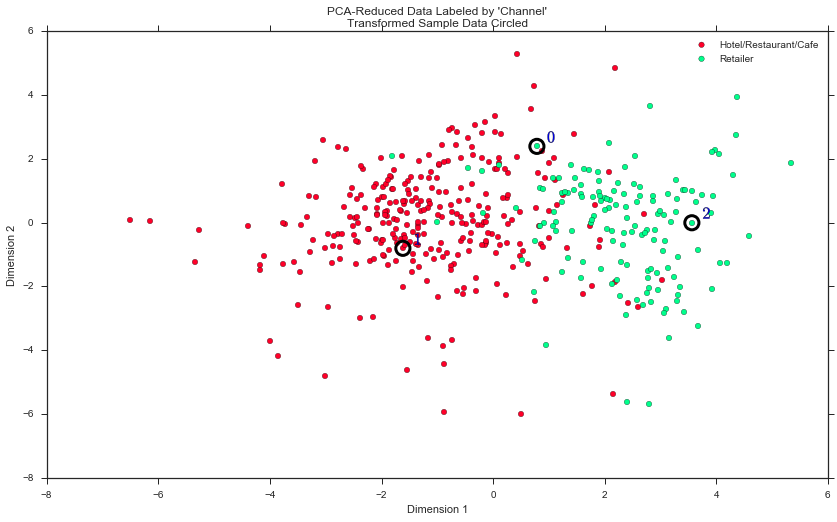

In [65]:
# Display the clustering results based on 'Channel' data 
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The number of clusters exactly matches the visualization above and the algorithm mostly matches what's above.  There are at least several points in the visualization that "cross over" to the other cluster so that it's categorized as HoReCa but is actually Retail (and vice versa).  My algorithm didn't quite catch these instances but overall, did a decent job in clustering overall.  It correctly categorized the first and third samples (points 0 and 2) as belonging to the same cluster.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.